# Importing packages

In [1]:
!pip install sklearn

Defaulting to user installation because normal site-packages is not writeable
ERROR: Could not find a version that satisfies the requirement sklearn
ERROR: No matching distribution found for sklearn


In [2]:
#importing packages
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn import linear_model



# Reading Excel file saved in hard drive

In [3]:
#reading the file
df = pd.read_excel("fisher.xlsx", usecols =["P","R"])
df.head()

,P,R
0,17.0,5.90
1,17.1,5.65
2,17.3,6.42
3,17.5,8.80
4,17.6,6.85


# Calculating annual inflation from quarterly CPI 

In [4]:

#computing the inflation rate
df['Inf'] = 400*np.log(df['P']/df['P'].shift(1)).dropna()
df.head()

,P,R,Inf
0,17.0,5.90,NaN
1,17.1,5.65,2.346048
2,17.3,6.42,4.651215
3,17.5,8.80,4.597752
4,17.6,6.85,2.279208


In [5]:
df.tail()

,P,R,Inf
103,116.2,7.73,5.197128
104,117.6,7.54,4.790476
105,118.5,7.44,3.049570
106,119.0,7.51,1.684213
107,119.8,7.56,2.680077


In [6]:
#dropping the N/A values
df1 = df.dropna(subset=["Inf"])

In [7]:

df1.head()


,P,R,Inf
1,17.1,5.65,2.346048
2,17.3,6.42,4.651215
3,17.5,8.80,4.597752
4,17.6,6.85,2.279208
5,17.9,6.37,6.760724


In [8]:
df1.tail()

,P,R,Inf
103,116.2,7.73,5.197128
104,117.6,7.54,4.790476
105,118.5,7.44,3.049570
106,119.0,7.51,1.684213
107,119.8,7.56,2.680077


# Plotting the time series: Inflation 

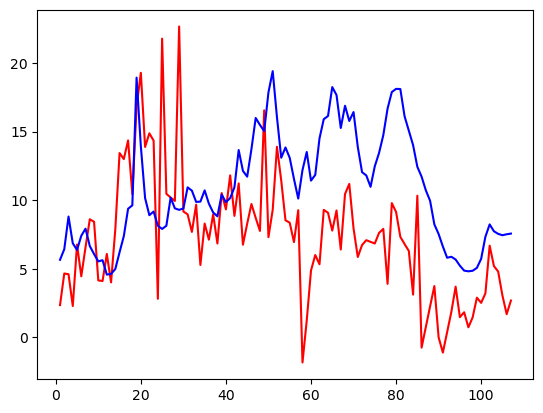

In [9]:

#plotting the series
plt.plot(df1["Inf"], color='red', label='INF')
plt.plot(df1['R'], color='blue', label ='R')


# Linear Regression

In [10]:
reg =linear_model.LinearRegression()
x =df1[['Inf']]
y =df1['R']
reg.fit(x,y)

LinearRegression()

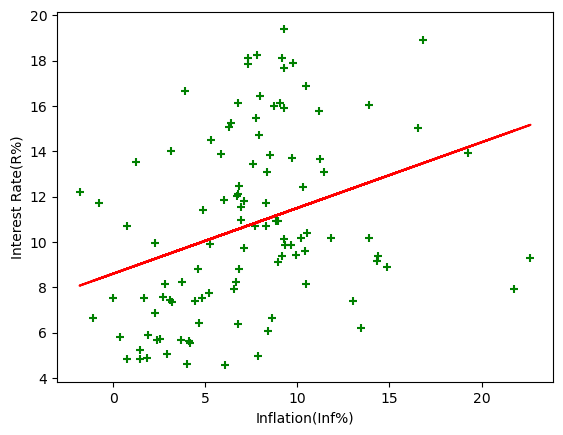

In [11]:
plt.xlabel('Inflation(Inf%)')
plt.ylabel('Interest Rate(R%)')
plt.scatter(df1.Inf, df1.R, color='green', marker= '+')
plt.plot(df1.Inf, reg.predict(x), color='red')

In [12]:
#X & y Variables defined
X = df1[['Inf']]
X = sm.add_constant(X)
y= df1['R']
#OLS model
model = sm.OLS(y,X).fit()
predictions =model.predict(X)
Q = model.summary()
print(Q)

                            OLS Regression Results                            
Dep. Variable:                      R   R-squared:                       0.110
Model:                            OLS   Adj. R-squared:                  0.102
Method:                 Least Squares   F-statistic:                     13.01
Date:                Fri, 18 Jun 2021   Prob (F-statistic):           0.000475
Time:                        12:54:04   Log-Likelihood:                -293.17
No. Observations:                 107   AIC:                             590.3
Df Residuals:                     105   BIC:                             595.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.6008      0.691     12.445      0.0

(c) The beta of 0.2898 is statistically significant, given the p-value is less than 5%. The intercept (constant in the above ) is 8.690, which indicates the real interest rate.

(d) The ACF and PACF charts show strong auto-correlations for both interest rates and inflation rates, since they are outside the bands. As per PACF, the first-order autocorrelation coefficient is significant, thus explains that $R_{t-2}$ is not directly correlated with $R_{t}$ but impacts $R_{t}$ through $R_{t-1}$

# Correlogram: ACF and PACF

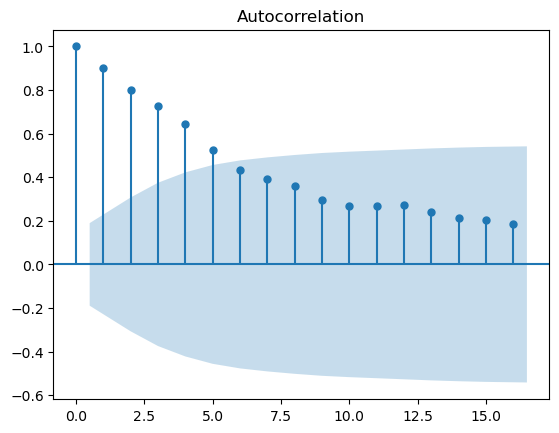

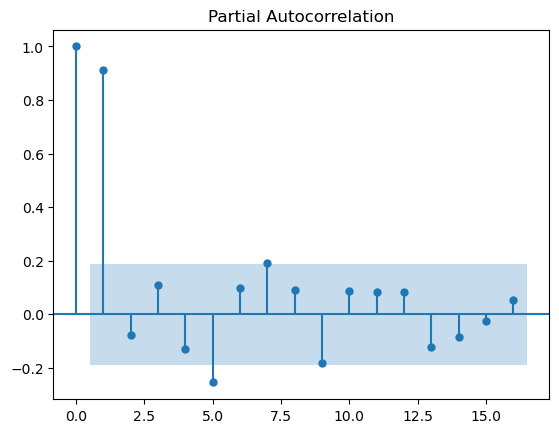

In [13]:
#running ACF and PACF for Interest rates
dta= df1.R
sm.graphics.tsa.plot_acf(dta.values.squeeze(),lags=16)
sm.graphics.tsa.plot_pacf(dta.values.squeeze(),lags=16)
plt.show()

In [14]:
# Generating the Q tables
dta= df1.R
r,q,p = sm.tsa.acf(dta.values.squeeze(), qstat=True)
data = np.c_[range(1,41), r[1:], q, p]
table = pd.DataFrame(data, columns=['lag', "AC", "Q", "Prob(>Q)"])
print (table.set_index('lag'))

            AC           Q      Prob(>Q)
lag                                     
1.0   0.902000   89.519458  3.036373e-21
2.0   0.800714  160.735161  1.249693e-35
3.0   0.727757  220.130163  1.881836e-47
4.0   0.643173  266.971371  1.434100e-56
5.0   0.522747  298.217241  2.420630e-62
6.0   0.432185  319.786128  4.692303e-66
7.0   0.390572  337.577638  5.612705e-69
8.0   0.359094  352.768802  2.322012e-71
9.0   0.296765  363.249933  9.357349e-73
10.0  0.266010  371.758078  9.546965e-74
11.0  0.269571  380.586555  8.045736e-75
12.0  0.271768  389.653956  5.861576e-76
13.0  0.239723  396.784131  1.068394e-76
14.0  0.213190  402.483940  3.799963e-77
15.0  0.201682  407.640445  1.713880e-77
16.0  0.184015  411.980324  1.119549e-77
17.0  0.121160  413.882666  2.312769e-77
18.0  0.069831  414.521694  8.538552e-77
19.0  0.061388  415.021143  3.277967e-76
20.0  0.037563  415.210297  1.421541e-75
21.0 -0.016528  415.247345  6.459737e-75
22.0 -0.049924  415.589329  2.476365e-74
23.0 -0.066728  

/usr/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:657: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  warnings.warn(
/usr/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


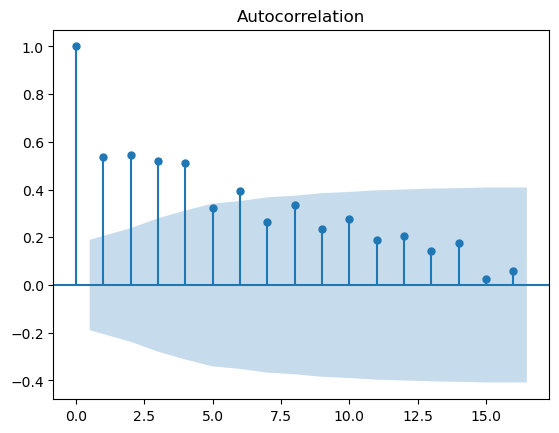

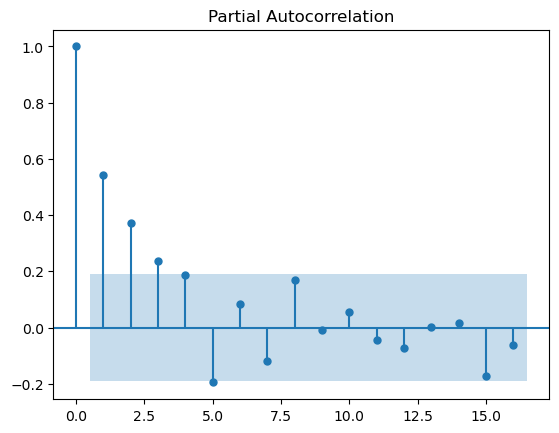

In [15]:
#running ACF and PACF for Inflation rates
dt= df1.Inf
sm.graphics.tsa.plot_acf(dt.values.squeeze(),lags=16)
sm.graphics.tsa.plot_pacf(dt.values.squeeze(),lags=16)
plt.show()

In [16]:
# Generating the Q tables
dt= df1.Inf
r,q,p = sm.tsa.acf(dt.values.squeeze(), qstat=True)
data = np.c_[range(1,41), r[1:], q, p]
table = pd.DataFrame(data, columns=['lag', "AC", "Q", "Prob(>Q)"])
print (table.set_index('lag'))

            AC           Q      Prob(>Q)
lag                                     
1.0   0.538668   31.926214  1.601414e-08
2.0   0.546611   65.113999  7.255626e-15
3.0   0.520620   95.510192  1.434392e-20
4.0   0.512728  125.277975  3.980674e-26
5.0   0.320958  137.056889  7.552935e-28
6.0   0.395231  155.094995  6.469263e-31
7.0   0.263380  163.185481  6.848909e-32
8.0   0.335635  176.456691  5.707403e-34
9.0   0.236423  183.108875  1.136013e-34
10.0  0.276055  192.271705  6.581374e-36
11.0  0.190578  196.684218  3.623768e-36
12.0  0.204584  201.822653  1.371277e-36
13.0  0.144076  204.398177  1.706136e-36
14.0  0.177849  208.364873  1.069236e-36
15.0  0.024400  208.440346  4.073673e-36
16.0  0.057629  208.865988  1.272269e-35
17.0  0.041227  209.086241  4.236566e-35
18.0 -0.013514  209.110173  1.498819e-34
19.0 -0.030582  209.234125  4.918207e-34
20.0  0.145808  212.084192  4.509795e-34
21.0  0.013762  212.109878  1.477257e-33
22.0  0.028119  212.218371  4.546336e-33
23.0  0.070134  

/usr/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:657: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  warnings.warn(
/usr/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(
